### Importing Essential Libraries

In [28]:
# Importing the Essential Libraries for Polynomial Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [29]:
# Loading the Dataset
data = pd.read_csv('Employee_Salary2.csv')

### Understand the dataset

In [30]:
# Check the first 5 rows of data for understanding
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [31]:
# Changing the Column names for ease of access
data.columns = ['years' , 'salary']

### Handling Null Values

In [32]:
# Check the null values is present in the dataset
# if the null values is present than we fill with the mean or median
data.isnull().sum()

years     0
salary    0
dtype: int64

### Analyze Correlation

In [33]:
# Analyze the correlation between the years of exeperience and salary
# if the correlation is significant than we perform the regression analysis
data.corr()

,years,salary
years,1.000000,0.772432
salary,0.772432,1.000000


### Visulise the dataset

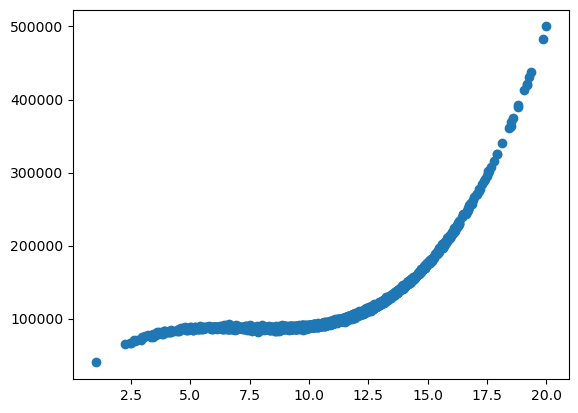

In [34]:
# After Checking the Correlation we check the relation is linear or non-linear
# If the Relationship is the Linear than we use the LinearRegression other wise we use the PolynomialRegression
plt.scatter(data['years'] , data['salary'])
plt.show()

### Transform the Feature into the Polynomial Form 

In [35]:
# We Split the Data into the feature and target variable
X = data[['years']]
y = data['salary']

In [9]:
# for perform the Polynomial Regression we transform our features into the polynomial form
from sklearn.preprocessing import PolynomialFeatures # importing the polynomialfeature class for transform the feature into the polynomial form
pf = PolynomialFeatures(degree = 2) # create the instnce of polynomial feature of degree 2 because our data looks like the quadratic form
X_poly = pf.fit_transform(X) 

### Split data into Trainnig and Testing Set

In [36]:
# Splitting the Data into the Trainning and the Testting set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_poly , y , test_size=0.2 , random_state=42)

### Train the Model

In [37]:
# IMporting and Train the Polynomial model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

### Checking Coefficent , Intercept & Model Accuracy

In [38]:
# Checkig the line coefficent , intercept and model accuracy
print("The Coefficents is : ",lr.coef_)
print("The Line Intercept is : ",lr.intercept_)
print("The Polynomial Regression model Accurecy is : ",lr.score(X_test , y_test)*100,"%")

The Coefficents is :  [     0.         -32653.27391759   2084.28020328]
The Line Intercept is :  203558.85587900912
The Polynomial Regression model Accurecy is :  94.8682476557746 %


### Visulise Actual data & Predicted Line

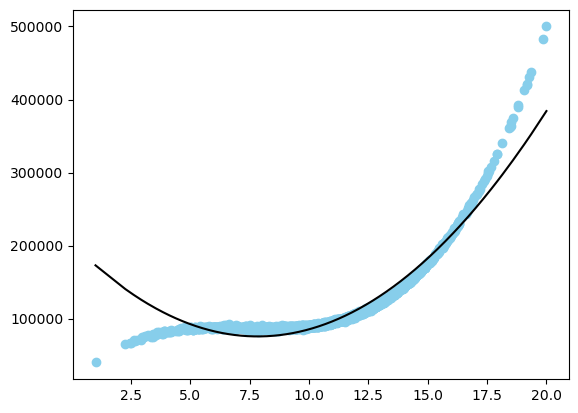

In [39]:
# Visulize the real data and the predicted line
y_pre = lr.predict(X_poly)
plt.scatter(data['years'] , data['salary'] , c='skyblue')
plt.plot(data['years'] , y_pre , c='black')
plt.show()